## Wide Residual Network

신경망을 깊이가 아닌 너비 관점으로 해석한 논문

## Abstract
딥러닝 네트워크에 Residual Connection(잔차연결, Skip connection)의 도입은 네트워크의 깊이를 수없이 확장시킬 가능성을 보여주었고, 이렇게 레이어를 쌓아 갈 수록 정확성이 높아지는 장점이 있다.</br>

-> 그러나 층이 깊어질 수록 훈력속도도 느려지는 단점이 계속 부각됨</br>
-> 논문의 저자는 ResNet block구조에 대해 실험을 진행 -> **너비**라는 개념을 도입</br>
-> 이 너비가 도입된 개념을 wide residual network(WRNs) 라 명명</br>
-> 실험의 예로 16층의 WRNs는 다른 DRN(Deep residual network)보다 더 좋은 성능을 보여줌</br>

여기서 너비 란? : Filter수를 증가시킨다는 의미
-> WRN은 Conv의 필터 수를 증가시켜서 신경망의 넓이를 증가시킴


## Introduction

CNN은 층의 깊이가 깊어지는 쪽으로 발전함 -> Vanishing gradient / Exploding gradient와 같은 문제가 발생함

#### 토막상식
기울기 소실(Gradient Vanishing), 기울기 폭주 (Gradient Exploding) : 역전파 과정에서 입력층으로 갈 수록 </br>
기울기가 점점 0에 수렴하거나 반대로 크게 발산하는 문제 -> 둘 다 학습성능의 저해를 유발함 

CNN에서 깊이를 발전시키는데 Residual Block가 한몫을 했으나, 깊이가 깊어짐으로 인해 발생하는 학습성능의 저하를</br>
해결하기 위해 너비를 넓히는 방안을 도입</br>
-> 이 너비를 넓히는 방안은 Filter의 수가 늘어나는 것이니 필연적으로 '파라미터'의 수가 증가함</br>
-> 파라미터의 개수를 제한 하기 위하여 Dropout을 사용함</br>

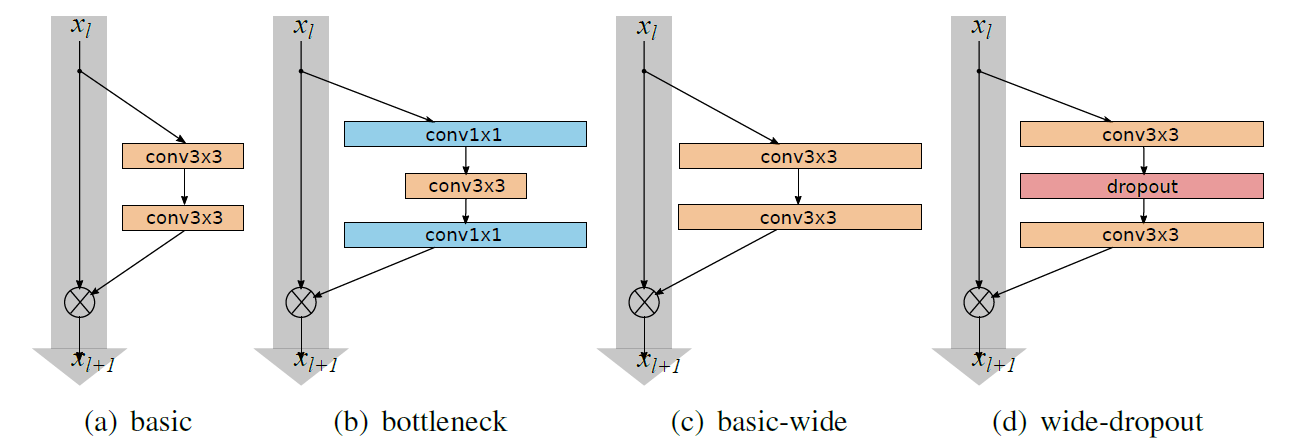

논문에서는 위 4가지 구조의 Residual block를 설명하면서 (c), (d)블럭을 위주로 WRN을 구성했다 설명</br>
(a) : 가장 기본적인 Residual Block로 BN(배치정규화) -> ReLU -> 3x3 Conv -> BN -> ReLU로 구성되어 있음</br>
(b) : 1x1conv(차원 축소) - BN - ReLU - 3x3conv - BN - ReLU - 1x1conv(차원 확대) - BN - ReLU의 구조를 갖는 </br>
bottleneck RB는 1x1 Conv를 활용하여 연산량을 줄이면서 정보량의 손실은 최소화 하는 
</br>그 Trade off의 합의점을 찾아낸 블록이다

(c), (d) : 논문이 제안하는 WRN의 기본 블록, 여기서 Pre-activation resnet 논문의 결과물을 함께 도입하여</br>
일반적인 RN의 구조인 `Conv - BN - ReLU` 순서를 사용하지 않고 `BN - ReLU - conv`를 사용함

## Wide residual networks

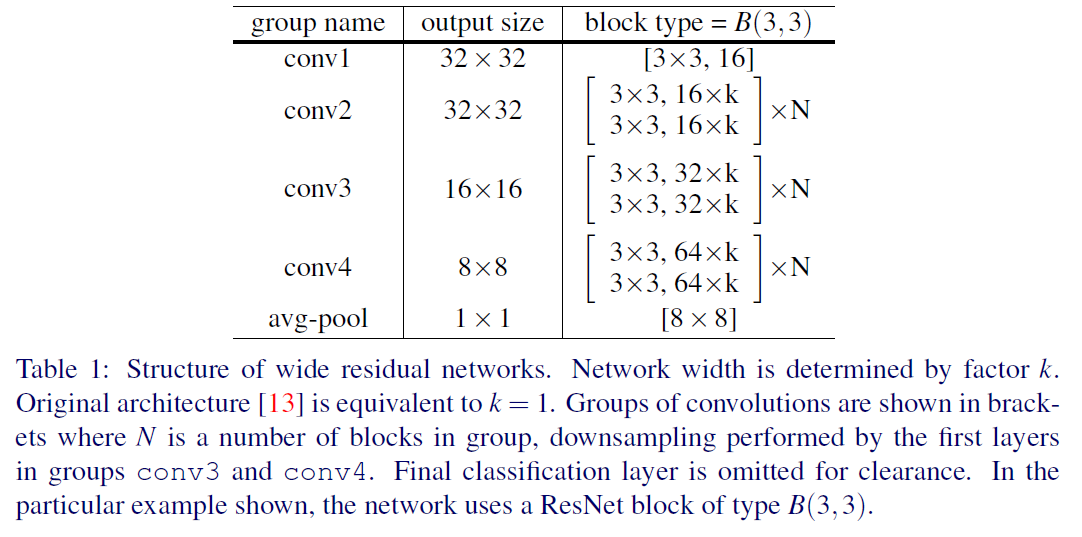

WRN의 네트워크 구조는 위 표와 같으며

stem에 해당하는 conv1 이후에 conv2, 3, 4 총 3개의 Residual block를 배치하는 식으로 구성함

여기서 B(3,3)은 Kernel_size를 의미하며, 커널 사이즈를 키우는 식으로 너비를 늘리지는 않음</br>
(이유는 다른 논문에서 3x3 kernel_size보다 큰 커널은 효용성이 떨어진다는 결과가 나옴)</br>

대신 `k` 상수를 통해 기존 conv layer에 적용될 필터를 k배 하는 식으로 너비를 늘려나감

`N`은 WRN의 깊이를 결정 -> 하나의 residual block는 N회 반복되는 소 RB의 연속임

그래서 여러 파생버전의 WRN이 만들어지며</br>
WRN-n-k 형식으로 이름을 붙이기로 결정(ex : WRN-40-2 는 필터가 2배된 40층 짜리 WRN)



## 좀 더 자세한 실험 수행

논문의 제안을 검증하기 위한 다양한 변인을 조정한 실험을 수행함
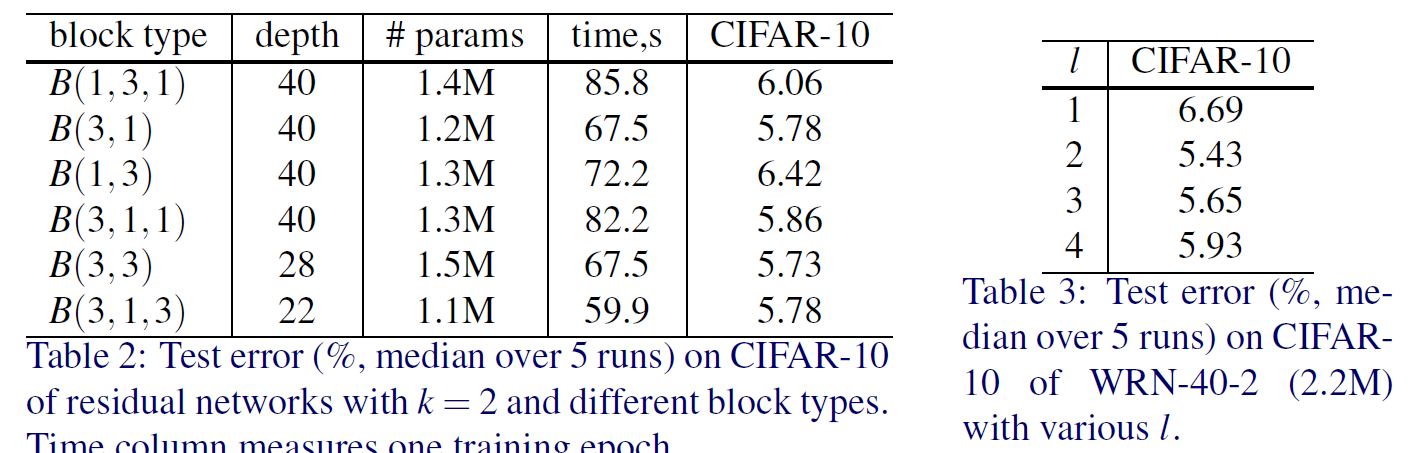</br>
왼쪽 그림은 Residual block을 구성하는 Conv의 개수와 필터 사이즈를 조정하면서 실험해본 결과임</br>
ex) B(1,3,1)은 1x1conv, 3x3conv, 1x1conv으로 구성된 RN</br>
오른쪽 그림은 이 Residual block를 구성하는 Conv 레이어 수에 따른 성능실험 ($l$은 레이어 수를 의미함)

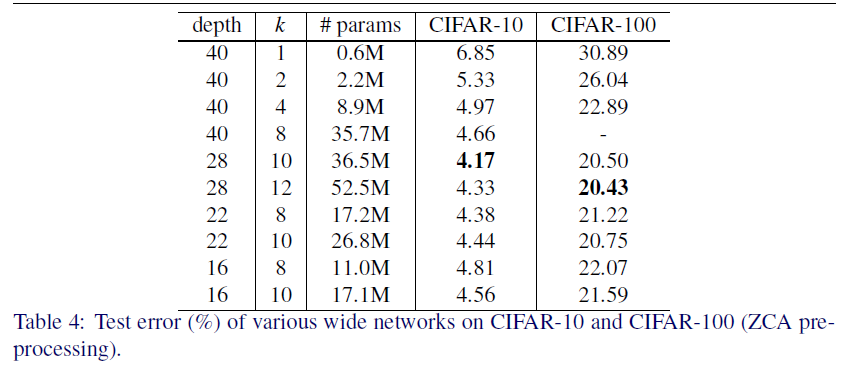</br>
이거는 레이어의 깊이(레이어 수)와 필터 개수를 조정하여 얻은 결과물</br>
(너무 깊어도 안되고 너무 넓어도 안됨, 약간 Trade off 개념으로 동작함함)

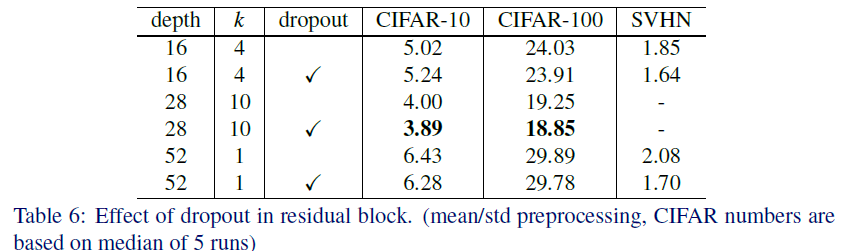</br>
이거는 WRN의 Dropout의 적용 유/무에 따른 차이 -> Dropout는 있는게 좋다

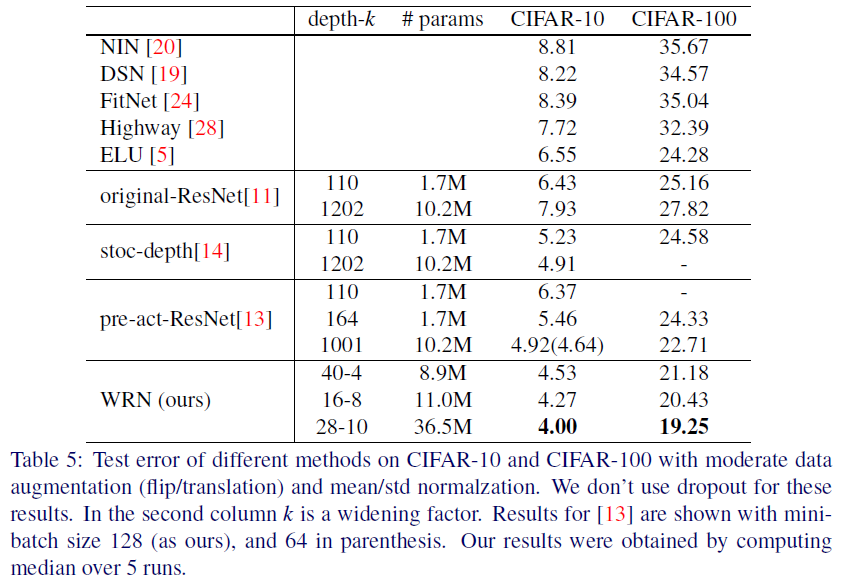

최종적으로 WRN설계를 완료했고, 표에서 보면 WRN-28-10이 가장 좋은 성능을 내고 있음

# 모델 구현하기

1) 베이스 블럭 설계

<div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        <img src="./img/07.png" alt="image" style="max-width: 100%; height: 60%;">
    </div>
    <div style="flex: 1; padding-left: 10px;">
        WRN에서 소개한 기본 블록을 활용하며,</br> `BN - ReLU - conv`를 준수하기</br>
        dropout도 구현을 해두기
    </div>
</div>

In [1]:
import torch
import torch.nn as nn

In [2]:
class BaseBlock(nn.Module):
    def __init__(self, in_channels, out_channels, dropout_rate=0.0, stride=1):
        super(BaseBlock, self).__init__()

        self.bn1 = nn.BatchNorm2d(in_channels)
        self.relu1 = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        #이 conv1은 stride를 인자값으로 받는다

        self.dropout_rate = dropout_rate
        self.dropout = nn.Dropout(p=dropout_rate)

        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        #이 conv2는 stride가 1이다

        self.shortcut = nn.Sequential() #숏컷 레이어는 이렇게 쓰는거구나;;;
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0, bias=False)
            )
    
    def forward(self, x):
        out = self.bn1(x)
        out = self.relu1(out)
        out = self.conv1(out)

        if self.dropout_rate > 0:
            out = self.dropout(out)

        out = self.bn2(out)
        out = self.relu2(out)
        out = self.conv2(out)

        out += self.shortcut(x)
        return out

<div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        <img src="./img/08.png" alt="image2" style="max-width: 100%; height: 60%;">
    </div>
    <div style="flex: 1; padding-left: 10px;">
        위 기본블럭을 가지고 WRN을 만드는데 레이어(Depth)는 </br>무조건 `6*L + 4` 레이어가 되게 설계한다.</br></br>
        논문 구현한 코드에 그렇게 나와있음...</br></br>
        16층, 22층, 28층, 40층... 전부 `6*L + 4`임</br></br>
        widen_factor는 WRN의 핵심인 너비(`K`)임
    </div>
</div>

In [3]:
class WideResNet(nn.Module):
    def __init__(self, depth, widen_factor, dropout_rate, num_classes=10):
        super(WideResNet, self).__init__()
        self.in_channels = 16
        
        assert (depth - 4) % 6 == 0, 'Depth should be 6n+4' #확인용도
        N = (depth - 4) // 6 

        K = widen_factor #위 표에 나와있는 N, K 상수 구현하기

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)

        self.layer2 = self._make_layer(16*K, N, dropout_rate, stride=1)
        self.layer3 = self._make_layer(32*K, N, dropout_rate, stride=2)
        self.layer4 = self._make_layer(64*K, N, dropout_rate, stride=2)

        #Avg_pool -> 논문 구현에서 AdaptiveAvgPool2d이거 쓰는게 정신건강에 좋다...
        self.bn1 = nn.BatchNorm2d(64*K)
        self.relu = nn.ReLU(inplace=True)
        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(64*K, num_classes)

    #layer2~4(conv2~4)에 해당하는 내부함수 설계
    def _make_layer(self, out_channels, blocks, dropout_rate, stride):
        layers = []
        for i in range(blocks):
            if i == 0:
                layers.append(BaseBlock(self.in_channels, out_channels, dropout_rate, stride))
            else:
                layers.append(BaseBlock(out_channels, out_channels, dropout_rate, stride=1))
            self.in_channels = out_channels
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.bn1(x)
        x = self.relu(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1) #FC레이어에 넣기 전 flatten
        x = self.fc(x)
        return x



In [4]:
def wide_resnet_28_10(num_classes=10, dropout_rate=0.3):
    return WideResNet(depth=28, widen_factor=10, dropout_rate=dropout_rate, num_classes=num_classes)

def wide_resnet_40_10(num_classes=10, dropout_rate=0.3):
    return WideResNet(depth=40, widen_factor=10, dropout_rate=dropout_rate, num_classes=num_classes)


In [5]:
#모델이 잘 설계되었는지 검증하는 부분
from torchsummary import summary #설계한 모델의 요약본 출력 모듈

debug_model = wide_resnet_28_10()
summary(debug_model, input_size=(3, 64, 64), device='cpu')
debug_model2 = wide_resnet_40_10()
summary(debug_model2, input_size=(3, 64, 64), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             432
       BatchNorm2d-2           [-1, 16, 64, 64]              32
              ReLU-3           [-1, 16, 64, 64]               0
            Conv2d-4          [-1, 160, 64, 64]          23,040
           Dropout-5          [-1, 160, 64, 64]               0
       BatchNorm2d-6          [-1, 160, 64, 64]             320
              ReLU-7          [-1, 160, 64, 64]               0
            Conv2d-8          [-1, 160, 64, 64]         230,400
            Conv2d-9          [-1, 160, 64, 64]           2,560
        BaseBlock-10          [-1, 160, 64, 64]               0
      BatchNorm2d-11          [-1, 160, 64, 64]             320
             ReLU-12          [-1, 160, 64, 64]               0
           Conv2d-13          [-1, 160, 64, 64]         230,400
          Dropout-14          [-1, 160,

# 데이터셋 불러오기
CIFAR100을 사용

In [6]:
import torchvision #예제 이미지 데이터셋이 모여있는 모듈
from torchvision import datasets, transforms

train_raw_data = datasets.CIFAR100("rawdata", 
                                   train=True,
                                   download=True, 
                                   transform=transforms.ToTensor())
test_raw_data = datasets.CIFAR100("rawdata", 
                                   train=False,
                                   download=True, 
                                   transform=transforms.ToTensor())

# 학습 이미지 개수와 고유 라벨 개수 추출
num_train_images = len(train_raw_data)
unique_train_labels = len(set(train_raw_data.targets))

# 테스트 이미지 개수와 고유 라벨 개수 추출
num_test_images = len(test_raw_data)
unique_test_labels = len(set(test_raw_data.targets))

print(f"Training Images: {num_train_images}, Unique Labels: {unique_train_labels}")
print(f"Testing Images: {num_test_images}, Unique Labels: {unique_test_labels}")

Files already downloaded and verified
Files already downloaded and verified
Training Images: 50000, Unique Labels: 100
Testing Images: 10000, Unique Labels: 100


논문에서 사용한 데이터 전처리 및 데이터 증강기법

1. Padding and Cropping : 이미지를 좌우 4픽셀씩 Padding후 랜덤하게 32x32크기로 Crop</br>
2. Horizontal Flipping : 좌우반전</br>
3. Normalization : 이미지 정규화</br>
-> CIFAR-100는 측정된 mean, std가 존재함</br>
Mean: (0.5071, 0.4867, 0.4408)</br>
Standard Deviation: (0.2675, 0.2565, 0.2761)</br>

In [7]:
CIFAR_N_val = [[0.5071, 0.4867, 0.4408], [0.2675, 0.2565, 0.2761]]

train_transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32, 32)),            # 이미지 크기를 64x64로 변경
    transforms.RandomCrop(32, padding=4),  # 패딩 후 랜덤 크롭
    transforms.RandomHorizontalFlip(),     # 랜덤 좌우 반전
    transforms.Normalize(mean=CIFAR_N_val[0], std=CIFAR_N_val[1])
    
])
test_transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32, 32)),            # 이미지 크기를 32x32로 변경
    transforms.Normalize(mean=CIFAR_N_val[0], std=CIFAR_N_val[1])
    #훈련데이터의 평균, 표준편차 입력
])

train_loader = torch.utils.data.DataLoader(train_raw_data, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_raw_data, batch_size=128, shuffle=False)

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# CUDA가 사용 가능한 경우, 추가 정보 출력
if device.type == 'cuda':
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Capability: {torch.cuda.get_device_capability(0)}")
    print(f"Total Memory: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")  # GB 단위로 변환
    print(f"Number of GPUs: {torch.cuda.device_count()}")

cuda
GPU Name: NVIDIA GeForce RTX 4090
GPU Capability: (8, 9)
Total Memory: 23.99 GB
Number of GPUs: 1


In [9]:
ex_model = wide_resnet_28_10(num_classes=unique_train_labels)
ex_model.to(device)
summary(ex_model, input_size=(3, 32, 32), device='cuda') #WRN의 입력이미지는 32임

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4          [-1, 160, 32, 32]          23,040
           Dropout-5          [-1, 160, 32, 32]               0
       BatchNorm2d-6          [-1, 160, 32, 32]             320
              ReLU-7          [-1, 160, 32, 32]               0
            Conv2d-8          [-1, 160, 32, 32]         230,400
            Conv2d-9          [-1, 160, 32, 32]           2,560
        BaseBlock-10          [-1, 160, 32, 32]               0
      BatchNorm2d-11          [-1, 160, 32, 32]             320
             ReLU-12          [-1, 160, 32, 32]               0
           Conv2d-13          [-1, 160, 32, 32]         230,400
          Dropout-14          [-1, 160,

# 옵티마이저, 손실함수 정의

옵티마이저 : `SGD`를 논문에서 사용 -> Adam으로 변경하기</br>
주요 하이퍼 파라미터 : Learning rate (학습률): 0.1, Momentum: 0.9, Weight decay : 0.0005
```python
ptimizer = optim.SGD(ex_model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0005)
```

손실함수 : Learning rate decay: 학습률은 60, 120, 160 에폭에서 각각 0.2로 감소
```python
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[60, 120, 160], gamma=0.2)
```
다른 코드 구현 보면 스케줄러 일일이 다 설계해서 그거 이해가 안됬는데</br>
그냥 손쉽게 스케줄러를 구현하는 함수도 있엇음


In [10]:
from torch import optim

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# Adam 옵티마이저 정의
optimizer = optim.Adam(ex_model.parameters(), lr=0.001, weight_decay=0.0005)

# Learning rate 스케줄러 정의 (여기서는 CosineAnnealingLR을 사용)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

#여기서 CosineAnnealingLR -> Lr을 점진적으로 감소시키는 함수, 최대epoc를 200으로 잡고
#서서히 감소시킴

# 훈련함수, 검증함수 만들기

In [11]:
from tqdm import tqdm #훈련 진행상황 체크

def model_train(model, data_loader, loss_fn, optimizer_fn, scheduler_fn, processing_device):
    model.train()  # 모델을 훈련 모드로 설정

    # loss와 accuracy를 계산하기 위한 임시 변수를 생성
    run_size, run_loss, corr = 0, 0, 0

    progress_bar = tqdm(data_loader)  # 이때 사용되는 데이터는 훈련용 데이터

    for batch_idx, (image, label) in enumerate(progress_bar, start=1):
        # 입력된 데이터를 먼저 GPU로 이전하기
        image = image.to(processing_device)
        label = label.to(processing_device)

        # 전사 과정 수행
        pred = model(image)  # 출력이 1개 나온다.

        loss = loss_fn(pred, label)

        # 옵티마이저의 Gradient 초기화
        optimizer_fn.zero_grad()

        # backward 과정 수행
        loss.backward()  # Backpropagation을 진행하여 Gradient 계산
        optimizer_fn.step()  # 계산된 gradient(모델 파라미터)를 업데이트

        # 스케줄러 스텝
        scheduler_fn.step()

        # 여기부터는 학습이 잘 되고 있는지 확인하는 부분
        _, pred_class = pred.max(dim=1)
        corr += pred_class.eq(label).sum().item()

        run_loss += loss.item() * image.size(0)
        run_size += image.size(0)
        progress_bar.set_description('[Training] loss: ' +
                                     f'{run_loss / run_size:.4f}, accuracy: ' +
                                     f'{corr / run_size:.4f}')

    acc = corr / len(data_loader.dataset)

    return run_loss / len(data_loader.dataset), acc

In [12]:
def model_evaluate(model, data_loader, loss_fn, processing_device):
    model.eval()  # 모델을 평가 모드로 전환

    # gradient 업데이트를 방지해주자
    with torch.no_grad():

        # 여기서도 loss, accuracy 계산을 위한 임시 변수 선언
        run_loss, corr = 0, 0

        for image, label in data_loader:  # 이때 사용되는 데이터는 평가용 데이터
            # 입력된 데이터를 먼저 GPU로 이전하기
            image = image.to(processing_device)
            label = label.to(processing_device)

            # 평가 결과를 도출하자
            outputs = model(image)  # 평가모드는 1개만 출력이 나오나보네...

            _, pred = outputs.max(dim=1)

            # 모델의 평가 결과 도출 부분
            # 배치의 실제 크기에 맞추어 정확도와 손실을 계산
            corr += torch.sum(pred.eq(label)).item()
            run_loss += loss_fn(outputs, label).item() * image.size(0)

        # 전체 데이터셋에 대한 평균 손실과 정확도 계산
        acc = corr / len(data_loader.dataset)

        return run_loss / len(data_loader.dataset), acc

## 실행 및 결과 확인

In [13]:
# 학습과 검증 손실 및 정확도를 저장할 리스트
his_loss, his_accuracy = [], []

num_epoch = 150
MODEL_NAME = 'wide_resnet_cifar100'

for epoch in range(num_epoch):
    # 훈련 손실과 정확도를 반환 받습니다.
    train_loss, train_acc = model_train(ex_model, train_loader, criterion, optimizer, scheduler, device)
    print(f"epoch {epoch+1:03d}, Training loss: {train_loss:.4f}, Training accuracy: {train_acc:.4f}")

    # 검증 손실과 검증 정확도를 반환 받습니다.
    test_loss, test_acc = model_evaluate(ex_model, test_loader, criterion, device)
    print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

    # 손실과 정확도를 리스트에 저장
    his_loss.append((train_loss, test_loss))
    his_accuracy.append((train_acc, test_acc))

# 학습이 완료된 모델 저장
torch.save(ex_model.state_dict(), f'{MODEL_NAME}.pth')

[Training] loss: 3.9936, accuracy: 0.0814: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Training loss: 3.9936, Training accuracy: 0.0814
Test loss: 4.8167, Test accuracy: 0.0556


[Training] loss: 3.5131, accuracy: 0.1549: 100%|██████████| 391/391 [01:04<00:00,  6.10it/s]


Training loss: 3.5131, Training accuracy: 0.1549
Test loss: 4.7742, Test accuracy: 0.0681


[Training] loss: 3.1597, accuracy: 0.2124: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]


Training loss: 3.1597, Training accuracy: 0.2124
Test loss: 3.9235, Test accuracy: 0.1411


[Training] loss: 2.8841, accuracy: 0.2638: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Training loss: 2.8841, Training accuracy: 0.2638
Test loss: 4.0098, Test accuracy: 0.1454


[Training] loss: 2.6810, accuracy: 0.3030: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]


Training loss: 2.6810, Training accuracy: 0.3030
Test loss: 4.2851, Test accuracy: 0.1450


[Training] loss: 2.4968, accuracy: 0.3451: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]


Training loss: 2.4968, Training accuracy: 0.3451
Test loss: 3.0175, Test accuracy: 0.2593


[Training] loss: 2.3214, accuracy: 0.3790: 100%|██████████| 391/391 [01:04<00:00,  6.07it/s]


Training loss: 2.3214, Training accuracy: 0.3790
Test loss: 3.2457, Test accuracy: 0.2544


[Training] loss: 2.1938, accuracy: 0.4105: 100%|██████████| 391/391 [01:07<00:00,  5.79it/s]


Training loss: 2.1938, Training accuracy: 0.4105
Test loss: 3.4838, Test accuracy: 0.2569


[Training] loss: 2.0764, accuracy: 0.4305: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]


Training loss: 2.0764, Training accuracy: 0.4305
Test loss: 3.2480, Test accuracy: 0.2481


[Training] loss: 1.9637, accuracy: 0.4613: 100%|██████████| 391/391 [01:04<00:00,  6.08it/s]


Training loss: 1.9637, Training accuracy: 0.4613
Test loss: 2.7298, Test accuracy: 0.3224


[Training] loss: 1.8542, accuracy: 0.4877: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Training loss: 1.8542, Training accuracy: 0.4877
Test loss: 2.6832, Test accuracy: 0.3510


[Training] loss: 1.7756, accuracy: 0.5042: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]


Training loss: 1.7756, Training accuracy: 0.5042
Test loss: 2.8297, Test accuracy: 0.3452


[Training] loss: 1.6898, accuracy: 0.5262: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Training loss: 1.6898, Training accuracy: 0.5262
Test loss: 2.7462, Test accuracy: 0.3574


[Training] loss: 1.6172, accuracy: 0.5421: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Training loss: 1.6172, Training accuracy: 0.5421
Test loss: 2.1394, Test accuracy: 0.4409


[Training] loss: 1.5471, accuracy: 0.5613: 100%|██████████| 391/391 [01:04<00:00,  6.08it/s]


Training loss: 1.5471, Training accuracy: 0.5613
Test loss: 2.2358, Test accuracy: 0.4389


[Training] loss: 1.4866, accuracy: 0.5798: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 1.4866, Training accuracy: 0.5798
Test loss: 2.0492, Test accuracy: 0.4746


[Training] loss: 1.4198, accuracy: 0.5921: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 1.4198, Training accuracy: 0.5921
Test loss: 1.9178, Test accuracy: 0.5052


[Training] loss: 1.3625, accuracy: 0.6082: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 1.3625, Training accuracy: 0.6082
Test loss: 1.9940, Test accuracy: 0.4982


[Training] loss: 1.3125, accuracy: 0.6217: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 1.3125, Training accuracy: 0.6217
Test loss: 1.7479, Test accuracy: 0.5324


[Training] loss: 1.2636, accuracy: 0.6329: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 1.2636, Training accuracy: 0.6329
Test loss: 1.6836, Test accuracy: 0.5461


[Training] loss: 1.2189, accuracy: 0.6454: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]


Training loss: 1.2189, Training accuracy: 0.6454
Test loss: 1.6351, Test accuracy: 0.5658


[Training] loss: 1.1856, accuracy: 0.6537: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]


Training loss: 1.1856, Training accuracy: 0.6537
Test loss: 1.6300, Test accuracy: 0.5623


[Training] loss: 1.1437, accuracy: 0.6661: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 1.1437, Training accuracy: 0.6661
Test loss: 1.5053, Test accuracy: 0.5889


[Training] loss: 1.1096, accuracy: 0.6760: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 1.1096, Training accuracy: 0.6760
Test loss: 1.6013, Test accuracy: 0.5717


[Training] loss: 1.0708, accuracy: 0.6874: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 1.0708, Training accuracy: 0.6874
Test loss: 1.4428, Test accuracy: 0.6035


[Training] loss: 1.0468, accuracy: 0.6943: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 1.0468, Training accuracy: 0.6943
Test loss: 1.5529, Test accuracy: 0.5866


[Training] loss: 1.0143, accuracy: 0.7036: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 1.0143, Training accuracy: 0.7036
Test loss: 1.6529, Test accuracy: 0.5773


[Training] loss: 0.9850, accuracy: 0.7111: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.9850, Training accuracy: 0.7111
Test loss: 1.5746, Test accuracy: 0.5826


[Training] loss: 0.9624, accuracy: 0.7157: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.9624, Training accuracy: 0.7157
Test loss: 1.5945, Test accuracy: 0.5828


[Training] loss: 0.9360, accuracy: 0.7254: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.9360, Training accuracy: 0.7254
Test loss: 1.5299, Test accuracy: 0.5878


[Training] loss: 0.9184, accuracy: 0.7296: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.9184, Training accuracy: 0.7296
Test loss: 1.5219, Test accuracy: 0.5975


[Training] loss: 0.8961, accuracy: 0.7337: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]


Training loss: 0.8961, Training accuracy: 0.7337
Test loss: 1.8073, Test accuracy: 0.5473


[Training] loss: 0.8773, accuracy: 0.7389: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]


Training loss: 0.8773, Training accuracy: 0.7389
Test loss: 1.8018, Test accuracy: 0.5591


[Training] loss: 0.8631, accuracy: 0.7457: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.8631, Training accuracy: 0.7457
Test loss: 1.8060, Test accuracy: 0.5594


[Training] loss: 0.8421, accuracy: 0.7517: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.8421, Training accuracy: 0.7517
Test loss: 1.6629, Test accuracy: 0.5730


[Training] loss: 0.8154, accuracy: 0.7577: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.8154, Training accuracy: 0.7577
Test loss: 1.7574, Test accuracy: 0.5680


[Training] loss: 0.8036, accuracy: 0.7615: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.8036, Training accuracy: 0.7615
Test loss: 2.5914, Test accuracy: 0.4656


[Training] loss: 0.7894, accuracy: 0.7655: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.7894, Training accuracy: 0.7655
Test loss: 2.0442, Test accuracy: 0.5192


[Training] loss: 0.7734, accuracy: 0.7710: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.7734, Training accuracy: 0.7710
Test loss: 1.9629, Test accuracy: 0.5301


[Training] loss: 0.7648, accuracy: 0.7720: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.7648, Training accuracy: 0.7720
Test loss: 2.0796, Test accuracy: 0.5188


[Training] loss: 0.7611, accuracy: 0.7713: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.7611, Training accuracy: 0.7713
Test loss: 2.5989, Test accuracy: 0.4854


[Training] loss: 0.7270, accuracy: 0.7812: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.7270, Training accuracy: 0.7812
Test loss: 2.2976, Test accuracy: 0.4971


[Training] loss: 0.7224, accuracy: 0.7809: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.7224, Training accuracy: 0.7809
Test loss: 2.6558, Test accuracy: 0.4651


[Training] loss: 0.7194, accuracy: 0.7828: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.7194, Training accuracy: 0.7828
Test loss: 2.2109, Test accuracy: 0.5198


[Training] loss: 0.7005, accuracy: 0.7879: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.7005, Training accuracy: 0.7879
Test loss: 2.2904, Test accuracy: 0.4943


[Training] loss: 0.6972, accuracy: 0.7892: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.6972, Training accuracy: 0.7892
Test loss: 2.7563, Test accuracy: 0.4521


[Training] loss: 0.6916, accuracy: 0.7904: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.6916, Training accuracy: 0.7904
Test loss: 1.9531, Test accuracy: 0.5562


[Training] loss: 0.6831, accuracy: 0.7933: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.6831, Training accuracy: 0.7933
Test loss: 2.1252, Test accuracy: 0.5186


[Training] loss: 0.6734, accuracy: 0.7945: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.6734, Training accuracy: 0.7945
Test loss: 2.2758, Test accuracy: 0.5171


[Training] loss: 0.6734, accuracy: 0.7967: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.6734, Training accuracy: 0.7967
Test loss: 2.0280, Test accuracy: 0.5552


[Training] loss: 0.6580, accuracy: 0.7995: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]


Training loss: 0.6580, Training accuracy: 0.7995
Test loss: 1.9606, Test accuracy: 0.5622


[Training] loss: 0.6526, accuracy: 0.8001: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.6526, Training accuracy: 0.8001
Test loss: 1.7867, Test accuracy: 0.5895


[Training] loss: 0.6473, accuracy: 0.8024: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.6473, Training accuracy: 0.8024
Test loss: 1.5615, Test accuracy: 0.6150


[Training] loss: 0.6377, accuracy: 0.8060: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.6377, Training accuracy: 0.8060
Test loss: 1.6073, Test accuracy: 0.6214


[Training] loss: 0.6359, accuracy: 0.8066: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.6359, Training accuracy: 0.8066
Test loss: 1.4884, Test accuracy: 0.6291


[Training] loss: 0.6379, accuracy: 0.8055: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]


Training loss: 0.6379, Training accuracy: 0.8055
Test loss: 1.4368, Test accuracy: 0.6502


[Training] loss: 0.6285, accuracy: 0.8089: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.6285, Training accuracy: 0.8089
Test loss: 1.5448, Test accuracy: 0.6315


[Training] loss: 0.6146, accuracy: 0.8137: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.6146, Training accuracy: 0.8137
Test loss: 1.4675, Test accuracy: 0.6394


[Training] loss: 0.6100, accuracy: 0.8134: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.6100, Training accuracy: 0.8134
Test loss: 1.4840, Test accuracy: 0.6385


[Training] loss: 0.5955, accuracy: 0.8193: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]


Training loss: 0.5955, Training accuracy: 0.8193
Test loss: 1.4836, Test accuracy: 0.6443


[Training] loss: 0.6053, accuracy: 0.8154: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.6053, Training accuracy: 0.8154
Test loss: 1.4264, Test accuracy: 0.6458


[Training] loss: 0.5969, accuracy: 0.8194: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.5969, Training accuracy: 0.8194
Test loss: 1.4483, Test accuracy: 0.6491


[Training] loss: 0.5905, accuracy: 0.8200: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.5905, Training accuracy: 0.8200
Test loss: 1.4297, Test accuracy: 0.6475


[Training] loss: 0.5870, accuracy: 0.8218: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.5870, Training accuracy: 0.8218
Test loss: 1.4746, Test accuracy: 0.6448


[Training] loss: 0.5851, accuracy: 0.8219: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.5851, Training accuracy: 0.8219
Test loss: 1.4527, Test accuracy: 0.6460


[Training] loss: 0.5747, accuracy: 0.8263: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.5747, Training accuracy: 0.8263
Test loss: 1.4336, Test accuracy: 0.6518


[Training] loss: 0.5639, accuracy: 0.8300: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.5639, Training accuracy: 0.8300
Test loss: 1.4660, Test accuracy: 0.6488


[Training] loss: 0.5554, accuracy: 0.8333: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.5554, Training accuracy: 0.8333
Test loss: 1.4096, Test accuracy: 0.6608


[Training] loss: 0.5626, accuracy: 0.8309: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.5626, Training accuracy: 0.8309
Test loss: 1.4283, Test accuracy: 0.6535


[Training] loss: 0.5564, accuracy: 0.8313: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.5564, Training accuracy: 0.8313
Test loss: 1.4312, Test accuracy: 0.6490


[Training] loss: 0.5464, accuracy: 0.8355: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.5464, Training accuracy: 0.8355
Test loss: 1.5319, Test accuracy: 0.6401


[Training] loss: 0.5448, accuracy: 0.8345: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]


Training loss: 0.5448, Training accuracy: 0.8345
Test loss: 1.4962, Test accuracy: 0.6444


[Training] loss: 0.5384, accuracy: 0.8384: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]


Training loss: 0.5384, Training accuracy: 0.8384
Test loss: 1.4933, Test accuracy: 0.6363


[Training] loss: 0.5296, accuracy: 0.8422: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.5296, Training accuracy: 0.8422
Test loss: 1.5695, Test accuracy: 0.6279


[Training] loss: 0.5343, accuracy: 0.8401: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.5343, Training accuracy: 0.8401
Test loss: 1.5613, Test accuracy: 0.6321


[Training] loss: 0.5212, accuracy: 0.8446: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.5212, Training accuracy: 0.8446
Test loss: 1.6224, Test accuracy: 0.6150


[Training] loss: 0.5265, accuracy: 0.8421: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.5265, Training accuracy: 0.8421
Test loss: 1.6975, Test accuracy: 0.6059


[Training] loss: 0.5192, accuracy: 0.8441: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.5192, Training accuracy: 0.8441
Test loss: 1.7157, Test accuracy: 0.6030


[Training] loss: 0.5170, accuracy: 0.8439: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]


Training loss: 0.5170, Training accuracy: 0.8439
Test loss: 1.8529, Test accuracy: 0.5789


[Training] loss: 0.5160, accuracy: 0.8451: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.5160, Training accuracy: 0.8451
Test loss: 1.8907, Test accuracy: 0.5819


[Training] loss: 0.5059, accuracy: 0.8477: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.5059, Training accuracy: 0.8477
Test loss: 2.0828, Test accuracy: 0.5490


[Training] loss: 0.5131, accuracy: 0.8468: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.5131, Training accuracy: 0.8468
Test loss: 2.2964, Test accuracy: 0.5293


[Training] loss: 0.5131, accuracy: 0.8460: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.5131, Training accuracy: 0.8460
Test loss: 1.9013, Test accuracy: 0.5722


[Training] loss: 0.5089, accuracy: 0.8460: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.5089, Training accuracy: 0.8460
Test loss: 2.1005, Test accuracy: 0.5550


[Training] loss: 0.4986, accuracy: 0.8512: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]


Training loss: 0.4986, Training accuracy: 0.8512
Test loss: 2.5044, Test accuracy: 0.5147


[Training] loss: 0.5016, accuracy: 0.8484: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]


Training loss: 0.5016, Training accuracy: 0.8484
Test loss: 2.5983, Test accuracy: 0.5063


[Training] loss: 0.4990, accuracy: 0.8499: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.4990, Training accuracy: 0.8499
Test loss: 2.1892, Test accuracy: 0.5405


[Training] loss: 0.4989, accuracy: 0.8496: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]


Training loss: 0.4989, Training accuracy: 0.8496
Test loss: 2.5448, Test accuracy: 0.5080


[Training] loss: 0.4984, accuracy: 0.8480: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.4984, Training accuracy: 0.8480
Test loss: 2.2598, Test accuracy: 0.5354


[Training] loss: 0.4870, accuracy: 0.8539: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]


Training loss: 0.4870, Training accuracy: 0.8539
Test loss: 1.9156, Test accuracy: 0.5928


[Training] loss: 0.4886, accuracy: 0.8525: 100%|██████████| 391/391 [01:04<00:00,  6.07it/s]


Training loss: 0.4886, Training accuracy: 0.8525
Test loss: 2.0102, Test accuracy: 0.5814


[Training] loss: 0.4865, accuracy: 0.8530: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]


Training loss: 0.4865, Training accuracy: 0.8530
Test loss: 2.1342, Test accuracy: 0.5645


[Training] loss: 0.4835, accuracy: 0.8520: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4835, Training accuracy: 0.8520
Test loss: 2.1532, Test accuracy: 0.5662


[Training] loss: 0.4863, accuracy: 0.8516: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4863, Training accuracy: 0.8516
Test loss: 1.9151, Test accuracy: 0.5910


[Training] loss: 0.4749, accuracy: 0.8544: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4749, Training accuracy: 0.8544
Test loss: 1.9640, Test accuracy: 0.5797


[Training] loss: 0.4685, accuracy: 0.8600: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4685, Training accuracy: 0.8600
Test loss: 1.8173, Test accuracy: 0.6052


[Training] loss: 0.4807, accuracy: 0.8546: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4807, Training accuracy: 0.8546
Test loss: 1.8601, Test accuracy: 0.6047


[Training] loss: 0.4744, accuracy: 0.8562: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4744, Training accuracy: 0.8562
Test loss: 1.8709, Test accuracy: 0.5989


[Training] loss: 0.4795, accuracy: 0.8544: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4795, Training accuracy: 0.8544
Test loss: 1.6340, Test accuracy: 0.6337


[Training] loss: 0.4657, accuracy: 0.8585: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4657, Training accuracy: 0.8585
Test loss: 1.6286, Test accuracy: 0.6324


[Training] loss: 0.4728, accuracy: 0.8554: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4728, Training accuracy: 0.8554
Test loss: 1.4959, Test accuracy: 0.6494


[Training] loss: 0.4735, accuracy: 0.8548: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4735, Training accuracy: 0.8548
Test loss: 1.5711, Test accuracy: 0.6413


[Training] loss: 0.4675, accuracy: 0.8582: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4675, Training accuracy: 0.8582
Test loss: 1.5065, Test accuracy: 0.6510


[Training] loss: 0.4693, accuracy: 0.8581: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4693, Training accuracy: 0.8581
Test loss: 1.5228, Test accuracy: 0.6525


[Training] loss: 0.4749, accuracy: 0.8577: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4749, Training accuracy: 0.8577
Test loss: 1.4932, Test accuracy: 0.6565


[Training] loss: 0.4692, accuracy: 0.8575: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Training loss: 0.4692, Training accuracy: 0.8575
Test loss: 1.4779, Test accuracy: 0.6611


[Training] loss: 0.4660, accuracy: 0.8600: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]


Training loss: 0.4660, Training accuracy: 0.8600
Test loss: 1.4686, Test accuracy: 0.6643


[Training] loss: 0.4628, accuracy: 0.8605: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4628, Training accuracy: 0.8605
Test loss: 1.5245, Test accuracy: 0.6484


[Training] loss: 0.4520, accuracy: 0.8654: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]


Training loss: 0.4520, Training accuracy: 0.8654
Test loss: 1.5395, Test accuracy: 0.6486


[Training] loss: 0.4539, accuracy: 0.8638: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4539, Training accuracy: 0.8638
Test loss: 1.5094, Test accuracy: 0.6503


[Training] loss: 0.4571, accuracy: 0.8620: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]


Training loss: 0.4571, Training accuracy: 0.8620
Test loss: 1.5613, Test accuracy: 0.6414


[Training] loss: 0.4535, accuracy: 0.8624: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]


Training loss: 0.4535, Training accuracy: 0.8624
Test loss: 1.5595, Test accuracy: 0.6438


[Training] loss: 0.4427, accuracy: 0.8679: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4427, Training accuracy: 0.8679
Test loss: 1.5693, Test accuracy: 0.6411


[Training] loss: 0.4531, accuracy: 0.8650: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4531, Training accuracy: 0.8650
Test loss: 1.5608, Test accuracy: 0.6415


[Training] loss: 0.4450, accuracy: 0.8663: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4450, Training accuracy: 0.8663
Test loss: 1.4905, Test accuracy: 0.6459


[Training] loss: 0.4455, accuracy: 0.8658: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4455, Training accuracy: 0.8658
Test loss: 1.5460, Test accuracy: 0.6405


[Training] loss: 0.4426, accuracy: 0.8688: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4426, Training accuracy: 0.8688
Test loss: 1.5334, Test accuracy: 0.6419


[Training] loss: 0.4460, accuracy: 0.8672: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4460, Training accuracy: 0.8672
Test loss: 1.5650, Test accuracy: 0.6362


[Training] loss: 0.4445, accuracy: 0.8678: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4445, Training accuracy: 0.8678
Test loss: 1.6484, Test accuracy: 0.6255


[Training] loss: 0.4366, accuracy: 0.8697: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]


Training loss: 0.4366, Training accuracy: 0.8697
Test loss: 1.5999, Test accuracy: 0.6397


[Training] loss: 0.4356, accuracy: 0.8707: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]


Training loss: 0.4356, Training accuracy: 0.8707
Test loss: 1.7942, Test accuracy: 0.6029


[Training] loss: 0.4422, accuracy: 0.8677: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]


Training loss: 0.4422, Training accuracy: 0.8677
Test loss: 1.6682, Test accuracy: 0.6212


[Training] loss: 0.4388, accuracy: 0.8717: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4388, Training accuracy: 0.8717
Test loss: 1.7968, Test accuracy: 0.5965


[Training] loss: 0.4292, accuracy: 0.8735: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4292, Training accuracy: 0.8735
Test loss: 1.8954, Test accuracy: 0.5827


[Training] loss: 0.4355, accuracy: 0.8690: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Training loss: 0.4355, Training accuracy: 0.8690
Test loss: 2.1880, Test accuracy: 0.5722


[Training] loss: 0.4305, accuracy: 0.8721: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Training loss: 0.4305, Training accuracy: 0.8721
Test loss: 2.0608, Test accuracy: 0.5512


[Training] loss: 0.4350, accuracy: 0.8710: 100%|██████████| 391/391 [01:05<00:00,  6.00it/s]


Training loss: 0.4350, Training accuracy: 0.8710
Test loss: 1.9208, Test accuracy: 0.5908


[Training] loss: 0.4344, accuracy: 0.8696: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Training loss: 0.4344, Training accuracy: 0.8696
Test loss: 2.0745, Test accuracy: 0.5545


[Training] loss: 0.4293, accuracy: 0.8723: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Training loss: 0.4293, Training accuracy: 0.8723
Test loss: 1.9463, Test accuracy: 0.5722


[Training] loss: 0.4341, accuracy: 0.8703: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Training loss: 0.4341, Training accuracy: 0.8703
Test loss: 2.2551, Test accuracy: 0.5394


[Training] loss: 0.4313, accuracy: 0.8720: 100%|██████████| 391/391 [01:05<00:00,  6.01it/s]


Training loss: 0.4313, Training accuracy: 0.8720
Test loss: 2.3055, Test accuracy: 0.5346


[Training] loss: 0.4326, accuracy: 0.8710: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4326, Training accuracy: 0.8710
Test loss: 2.0718, Test accuracy: 0.5582


[Training] loss: 0.4192, accuracy: 0.8730: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4192, Training accuracy: 0.8730
Test loss: 2.3586, Test accuracy: 0.5362


[Training] loss: 0.4299, accuracy: 0.8705: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4299, Training accuracy: 0.8705
Test loss: 2.6006, Test accuracy: 0.5177


[Training] loss: 0.4296, accuracy: 0.8696: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4296, Training accuracy: 0.8696
Test loss: 2.7403, Test accuracy: 0.5115


[Training] loss: 0.4151, accuracy: 0.8756: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4151, Training accuracy: 0.8756
Test loss: 2.2475, Test accuracy: 0.5660


[Training] loss: 0.4237, accuracy: 0.8719: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4237, Training accuracy: 0.8719
Test loss: 2.0368, Test accuracy: 0.5779


[Training] loss: 0.4175, accuracy: 0.8743: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4175, Training accuracy: 0.8743
Test loss: 2.1247, Test accuracy: 0.5675


[Training] loss: 0.4214, accuracy: 0.8734: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4214, Training accuracy: 0.8734
Test loss: 1.9624, Test accuracy: 0.5914


[Training] loss: 0.4219, accuracy: 0.8738: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4219, Training accuracy: 0.8738
Test loss: 1.7891, Test accuracy: 0.6103


[Training] loss: 0.4190, accuracy: 0.8728: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4190, Training accuracy: 0.8728
Test loss: 1.6960, Test accuracy: 0.6243


[Training] loss: 0.4166, accuracy: 0.8749: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]


Training loss: 0.4166, Training accuracy: 0.8749
Test loss: 1.7608, Test accuracy: 0.6277


[Training] loss: 0.4265, accuracy: 0.8693: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]


Training loss: 0.4265, Training accuracy: 0.8693
Test loss: 1.6842, Test accuracy: 0.6337


[Training] loss: 0.4098, accuracy: 0.8773: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4098, Training accuracy: 0.8773
Test loss: 1.5929, Test accuracy: 0.6494


[Training] loss: 0.4246, accuracy: 0.8731: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4246, Training accuracy: 0.8731
Test loss: 1.5152, Test accuracy: 0.6518


[Training] loss: 0.4236, accuracy: 0.8732: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4236, Training accuracy: 0.8732
Test loss: 1.5134, Test accuracy: 0.6553


[Training] loss: 0.4215, accuracy: 0.8727: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4215, Training accuracy: 0.8727
Test loss: 1.4929, Test accuracy: 0.6569


[Training] loss: 0.4078, accuracy: 0.8795: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4078, Training accuracy: 0.8795
Test loss: 1.5415, Test accuracy: 0.6518


[Training] loss: 0.4137, accuracy: 0.8756: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4137, Training accuracy: 0.8756
Test loss: 1.5611, Test accuracy: 0.6494


[Training] loss: 0.4201, accuracy: 0.8745: 100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


Training loss: 0.4201, Training accuracy: 0.8745
Test loss: 1.5244, Test accuracy: 0.6505


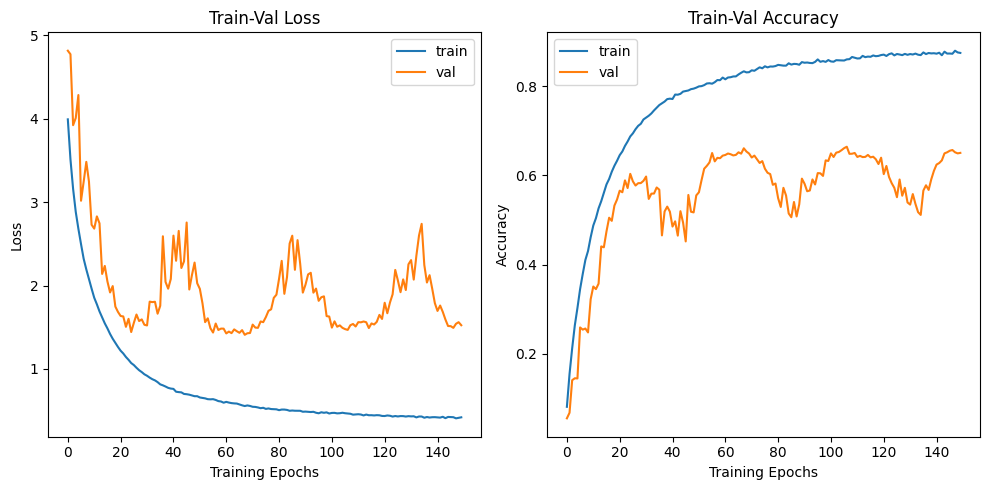

In [14]:
import matplotlib.pyplot as plt

# 손실 그래프
train_losses, val_losses = zip(*his_loss)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.xlabel('Training Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train-Val Loss')

# 정확도 그래프
train_accuracies, val_accuracies = zip(*his_accuracy)
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='train')
plt.plot(val_accuracies, label='val')
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train-Val Accuracy')

plt.tight_layout()
plt.show()

In [15]:
# 저장한 모델을 불러와서 최종 평가
ex_model.load_state_dict(torch.load(f'{MODEL_NAME}.pth'))
ex_model.to(device)

final_loss, final_acc = model_evaluate(ex_model, test_loader, criterion, device)
print(f'evaluation loss: {final_loss:.5f}, evaluation accuracy: {final_acc:.5f}')

evaluation loss: 1.52444, evaluation accuracy: 0.65050
